In [1]:
!git clone https://github.com/anantgupta129/TorcHood.git

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import torch
import lightning.pytorch as pl

from torchood.data.mnist_datamodule import MNISTDataModule
from torchood.models.variational_auto_encoders_module import VAE

In [ ]:
datamodule = MNISTDataModule()

In [9]:
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch import Trainer

# Optional: Logging with Weights & Biases
logger = [WandbLogger(project="VAE-MNIST"),CSVLogger(save_dir="csv_logs")]
model = VAE()
trainer = Trainer( max_epochs=30, accelerator="gpu",logger=logger)
trainer.fit(model=model, datamodule=datamodule)

INFO:lightning_fabric.utilities.seed:Global seed set to 1234
<ipython-input-6-e541b323d45c>:14: UnderReviewWarning: The feature resnet18_encoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.encoder = resnet18_encoder(False, False) # 128 ch
<ipython-input-2-da6057d5e4d4>:353: UnderReviewWarning: The feature ResNetEncoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  return ResNetEncoder(EncoderBlock, [2, 2, 2, 2], first_conv, maxpool1)
<ipython-input-2-da6057d5e4d4>:236: UnderReviewWarning: The feature EncoderBl

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


In [12]:
trainer.save_checkpoint("model.ckpt")

In [ ]:
vae = VAE.load_from_checkpoint("model.ckpt")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 2400x900 with 0 Axes>

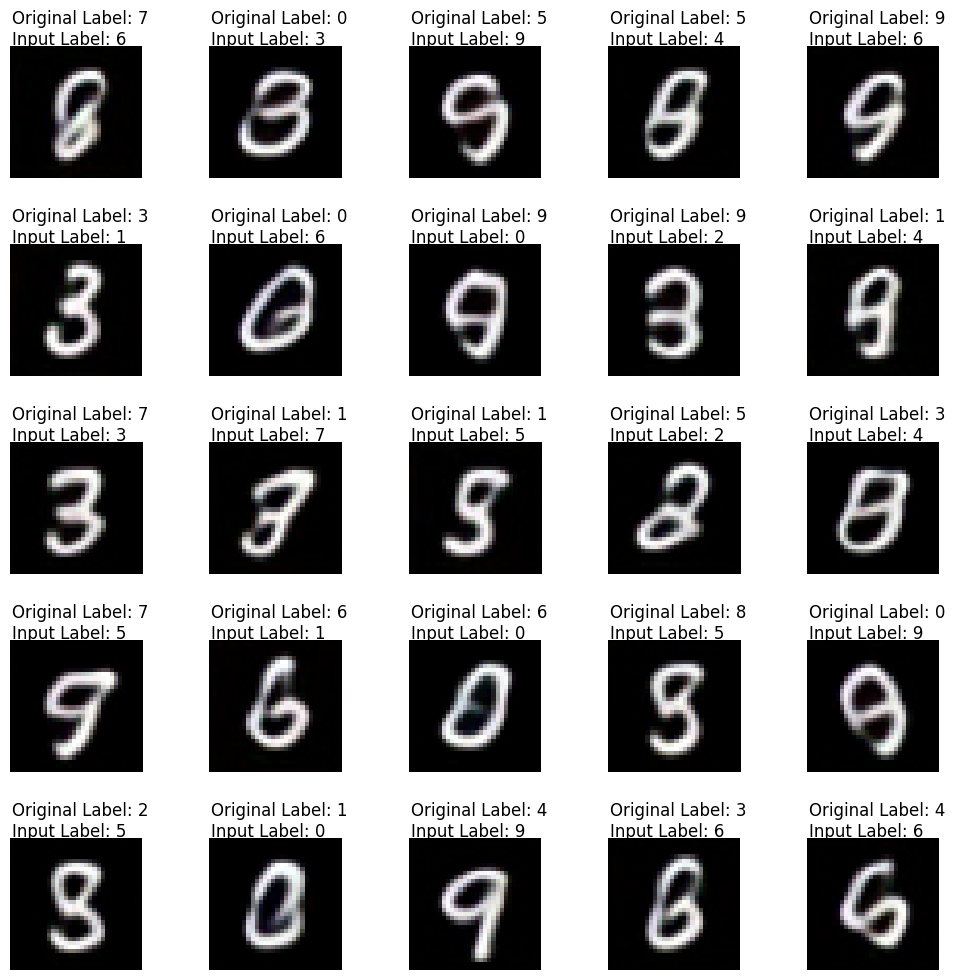

In [31]:
from torchood.utils.plotting import plot_vae_examples
test_loader = datamodule.val_dataloader()
test_data = datamodule.val_data()
mean = (0.1407, 0.1407, 0.1407)
std = (0.4081, 0.4081, 0.4081)
vae.to("cuda")
plot_vae_examples(test_loader,test_data, vae.net, mean, std)